### Data exploration step


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import random
from collections import Counter

# Set matplotlib to display inline
%matplotlib inline

# Make plots larger
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10


### load datasets


In [22]:
# Define paths
data_dir = Path('../data/raw/')
train_dir = data_dir / 'Training'
test_dir = data_dir / 'Testing'
classes = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']




### Visualize samples of dataset per class


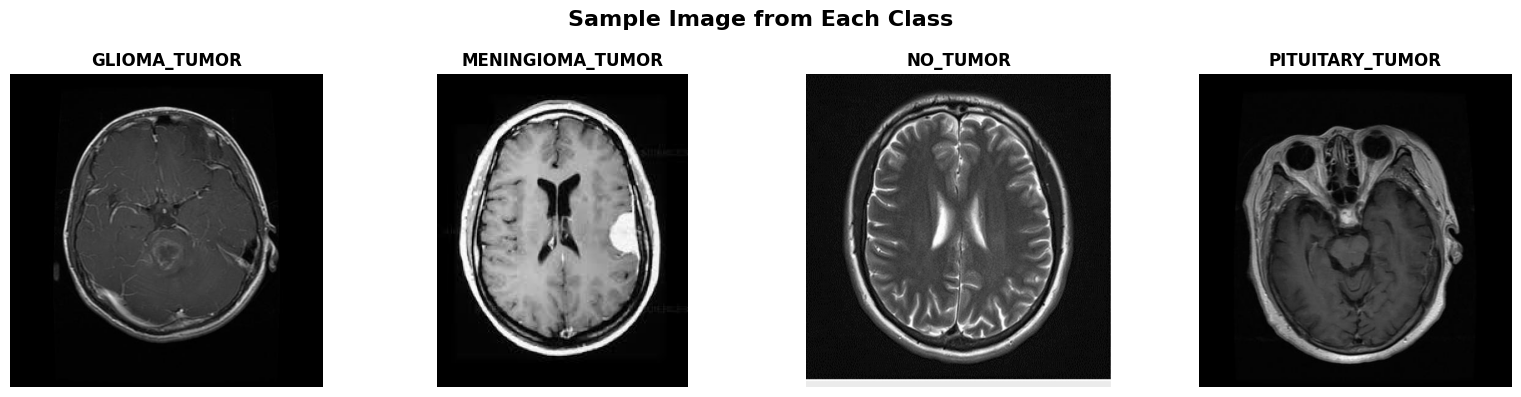

In [23]:
# Show one sample image from each class
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('Sample Image from Each Class', fontsize=16, fontweight='bold')

for i, cls in enumerate(classes):
    cls_dir = train_dir / cls
    
    # Get all images
    images = list(cls_dir.glob('*.jpg')) 
    
    # Pick random image
    img_path = random.choice(images)
    
    # Load and convert to RGB
    img = cv2.imread(str(img_path))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display
    axes[i].imshow(img_rgb)
    axes[i].set_title(cls.upper(), fontsize=12, fontweight='bold')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


### check images dimensions


In [26]:
print("Analyzing image shapes...\n")

shape_stats = {}

for cls in classes:
    cls_dir = train_dir / cls
    images = list(cls_dir.glob('*.jpg')) 
    
    # Sample 30 images to check shapes
    sample_size = min(30, len(images))
    samples = random.sample(images, sample_size)
    
    shapes = []
    for img_path in samples:
        img = cv2.imread(str(img_path))
        if img is not None:
            h, w, c = img.shape
            shapes.append((h, w, c))
    
    shapes = np.array(shapes)
    
    # Get unique shapes
    unique_shapes = np.unique(shapes[:, :2], axis=0)
    
    shape_stats[cls] = {
        'shapes': shapes,
        'unique': unique_shapes,
        'mean': shapes.mean(axis=0)
    }
    
    print(f"Class: {cls.upper()}")
    print(f"  Sample size: {len(shapes)}")
    print(f"  Mean dimensions (H × W × C): {shapes.mean(axis=0)}")
    print(f"  Min dimensions:  {shapes.min(axis=0)}")
    print(f"  Max dimensions:  {shapes.max(axis=0)}")
    print(f"  Unique shapes: {len(unique_shapes)}")
    
    if len(unique_shapes) == 1:
        print(f"  All images same size: {unique_shapes[0][0]} × {unique_shapes[0][1]}")
    else:
        print(f"  Different image sizes found:")
        for shape in unique_shapes[:3]:
            count = np.sum((shapes[:, :2] == shape).all(axis=1))
            print(f"     - {shape[0]} × {shape[1]}: {count} images")
    
    print("-"*70)

Analyzing image shapes...

Class: GLIOMA_TUMOR
  Sample size: 30
  Mean dimensions (H × W × C): [512. 512.   3.]
  Min dimensions:  [512 512   3]
  Max dimensions:  [512 512   3]
  Unique shapes: 1
  All images same size: 512 × 512
----------------------------------------------------------------------
Class: MENINGIOMA_TUMOR
  Sample size: 30
  Mean dimensions (H × W × C): [464.86666667 463.53333333   3.        ]
  Min dimensions:  [223 200   3]
  Max dimensions:  [512 512   3]
  Unique shapes: 8
  Different image sizes found:
     - 223 × 200: 2 images
     - 239 × 211: 1 images
     - 315 × 315: 1 images
----------------------------------------------------------------------
Class: NO_TUMOR
  Sample size: 30
  Mean dimensions (H × W × C): [360.8 344.5   3. ]
  Min dimensions:  [211 201   3]
  Max dimensions:  [ 630 1000    3]
  Unique shapes: 29
  Different image sizes found:
     - 211 × 219: 1 images
     - 216 × 232: 1 images
     - 225 × 225: 1 images
-----------------------------

### distribution of images per class


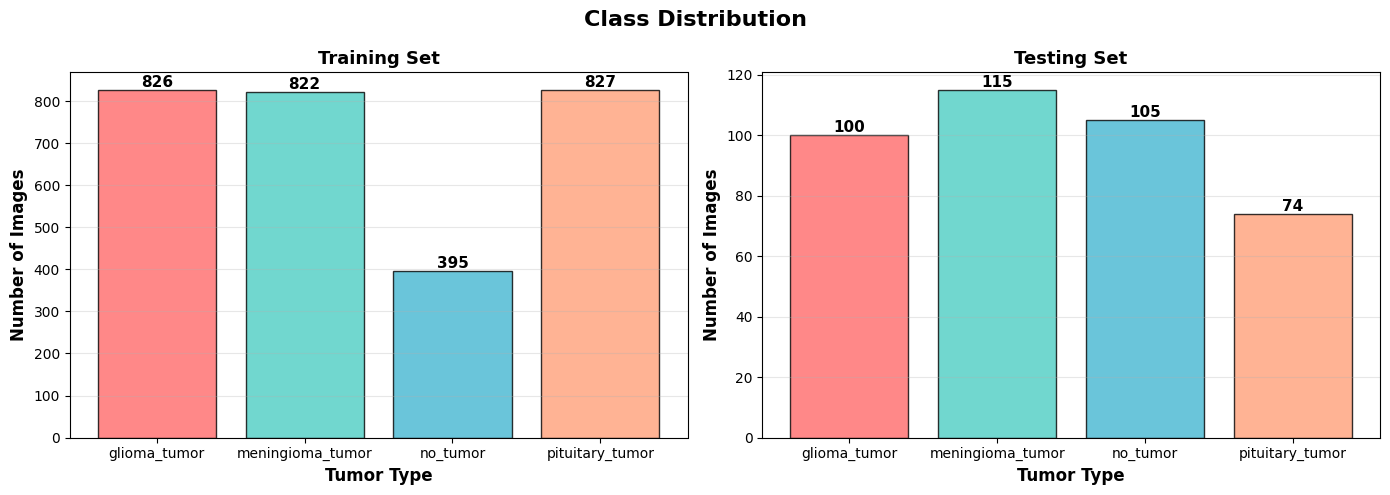

In [27]:
# Count images per class
train_counts = {}
test_counts = {}

for cls in classes:
    # Training
    train_cls_dir = train_dir / cls
    train_count = len(list(train_cls_dir.glob('*.jpg'))) + len(list(train_cls_dir.glob('*.png')))
    train_counts[cls] = train_count
    
    # Testing
    test_cls_dir = test_dir / cls
    test_count = len(list(test_cls_dir.glob('*.jpg'))) + len(list(test_cls_dir.glob('*.png')))
    test_counts[cls] = test_count

# Create bar plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Class Distribution', fontsize=16, fontweight='bold')

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

# Training set
bars1 = ax1.bar(train_counts.keys(), train_counts.values(), color=colors, alpha=0.8, edgecolor='black')
ax1.set_xlabel('Tumor Type', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Images', fontsize=12, fontweight='bold')
ax1.set_title('Training Set', fontsize=13, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Add count labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Testing set
bars2 = ax2.bar(test_counts.keys(), test_counts.values(), color=colors, alpha=0.8, edgecolor='black')
ax2.set_xlabel('Tumor Type', fontsize=12, fontweight='bold')
ax2.set_ylabel('Number of Images', fontsize=12, fontweight='bold')
ax2.set_title('Testing Set', fontsize=13, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add count labels on bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


min_count = min(train_counts.values())
imbalance_ratio = max_count / min_count

